# Linear and Polynomial Least Square Approximations

One of the most common tasks in science is to fit a curve to some observed data. This gives a coherent visual representation of those discrete points and helps find trends. Least square approximation is a simple technique to achieve this.

## Linear Least Squares

Consider a line $L$ given by $y = a_0 + a_1 x$. We need two parameters to define this line, and these parameters should be such that the "error" for this line is minimized. We define the error to be the sum of squares of the difference between given data points and predicted points on the line.

$$
S(a_0, a_1) = \sum^{m}_{i = 0} (y_i - a_1  x_i - a_0)^2
$$

where $(x_i, y_i)$ represent the $m+1$ data points that we want to fit. We now need to minimize this error. Notice that the error has no maxima, just a global minima. Therefore, we can simply equate its derivatives to zero.

$$
\begin{aligned}
\frac{\partial S}{\partial a_0} &= \sum^{m}_{i = 0} -2(y_i - a_1 x_i - a_0) &= 0 \\
\frac{\partial S}{\partial a_1} &= \sum^{m}_{i = 0} -2x_i(y_i - a_1 x_i - a_0) &= 0
\end{aligned}
$$

We get two linear equations in two variables, which can be solved to obtain our line. These equations are called ***normal equations***.

## Polynomial Least Squares

A natural generalization of the above method is to try and fit polynomials to the data. Proceeding as before, the error for an n-degree polynomial $y = \sum_{j=0}^{n}a_j x^j$ will be

$$
S(a_0, a_1 \ldots a_n) = \sum_{i = 0}^{m} (a_0 + a_1 x_i^1 + \ldots + a_n x_i^n - y_i)^2
$$

and the normal equations can be written as

$$
\frac{\partial S}{\partial a_k} = -2 \left( \sum_{i = 0}^{m} x_i^k y_i \right) + 2 \sum^{n}_{j = 0} a_j \left( \sum^{m}_{i = 0} x_i^{k + j} \right) = 0
$$

It is much more convenient to write these equations in matrix form as $A^T A \mathbf{x} = A^T \mathbf{y}$ where

$$
A =
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^n
\end{pmatrix}
\quad
\mathbf{x} =
\begin{pmatrix}
a_0 \\
a_1  \\
\vdots  \\
a_n 
\end{pmatrix}
\quad 
\mathbf{y} =
\begin{pmatrix}
y_0 \\
y_1  \\
\vdots  \\
y_m 
\end{pmatrix}
$$

Solving these linear equations gives us our required polynomial.

## Example

We'll start by generating a random set of points to act as our data. Then we'll try to solve the normal equations to find a linear and a cubic polynomial.

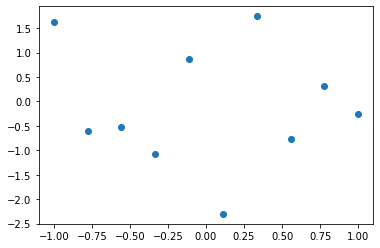

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed to get the same random points on each run
np.random.seed(1)

# Generate 10 random points to approximate
m = 10
x = np.linspace(-1, 1, num=m)
y = np.random.normal(size=m)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)

We now define some functions to make things easier later. `least_squares` calculates the solution of the normal equations using an inbuilt function from `numpy`. In a later article, we'll look at some methods to solve these equations ourselves. `poly` calculates the value of the polynomial that we found on a set of values of $x$.

In [9]:
# Calculate the coefficients of our polynomial by solving the normal equations
def least_squares(x, y, m, n):
    Y = np.reshape(y, (10, 1))
    A = np.zeros((m, n + 1))

    for i in range(n + 1):
        A[:,i] = x ** i

    X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, Y))
    return X

# Calculate the value of our polynomial at 100 given x
def poly(x, coeffs, n):
    Y = np.zeros((100, n + 1))

    for i in range(n + 1):
        Y[:,i] = x ** i

    return np.dot(Y, coeffs)

And now we can finally apply those functions to our dataset.

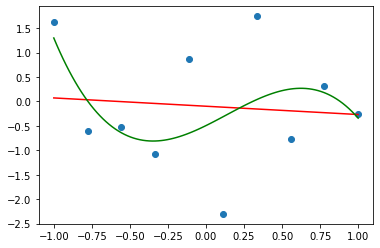

In [10]:
# Calculate linear approximation
n1 = 1
coeffs1 = least_squares(x, y, m, n1)

# Calculate cubic approximation
n3 = 3
coeffs3 = least_squares(x, y, m, n3)

# Plot linear
plot_x = np.linspace(-1, 1, num=100)
plot_y1 = poly(plot_x, coeffs1, n1)
ax.plot(plot_x, plot_y1, color='red')

# Plot cubic
plot_y3 = poly(plot_x, coeffs3, n3)
ax.plot(plot_x, plot_y3, color='green')

fig

On the graph above are the linear and cubic approximations of our data calculated by minimizing an error function. We defined this error function as the sum of the square of the error at each given datapoint. We then minimized this error by simply equating its derivatives to zero. That gave us some linear equations that we solved to get our parameters.